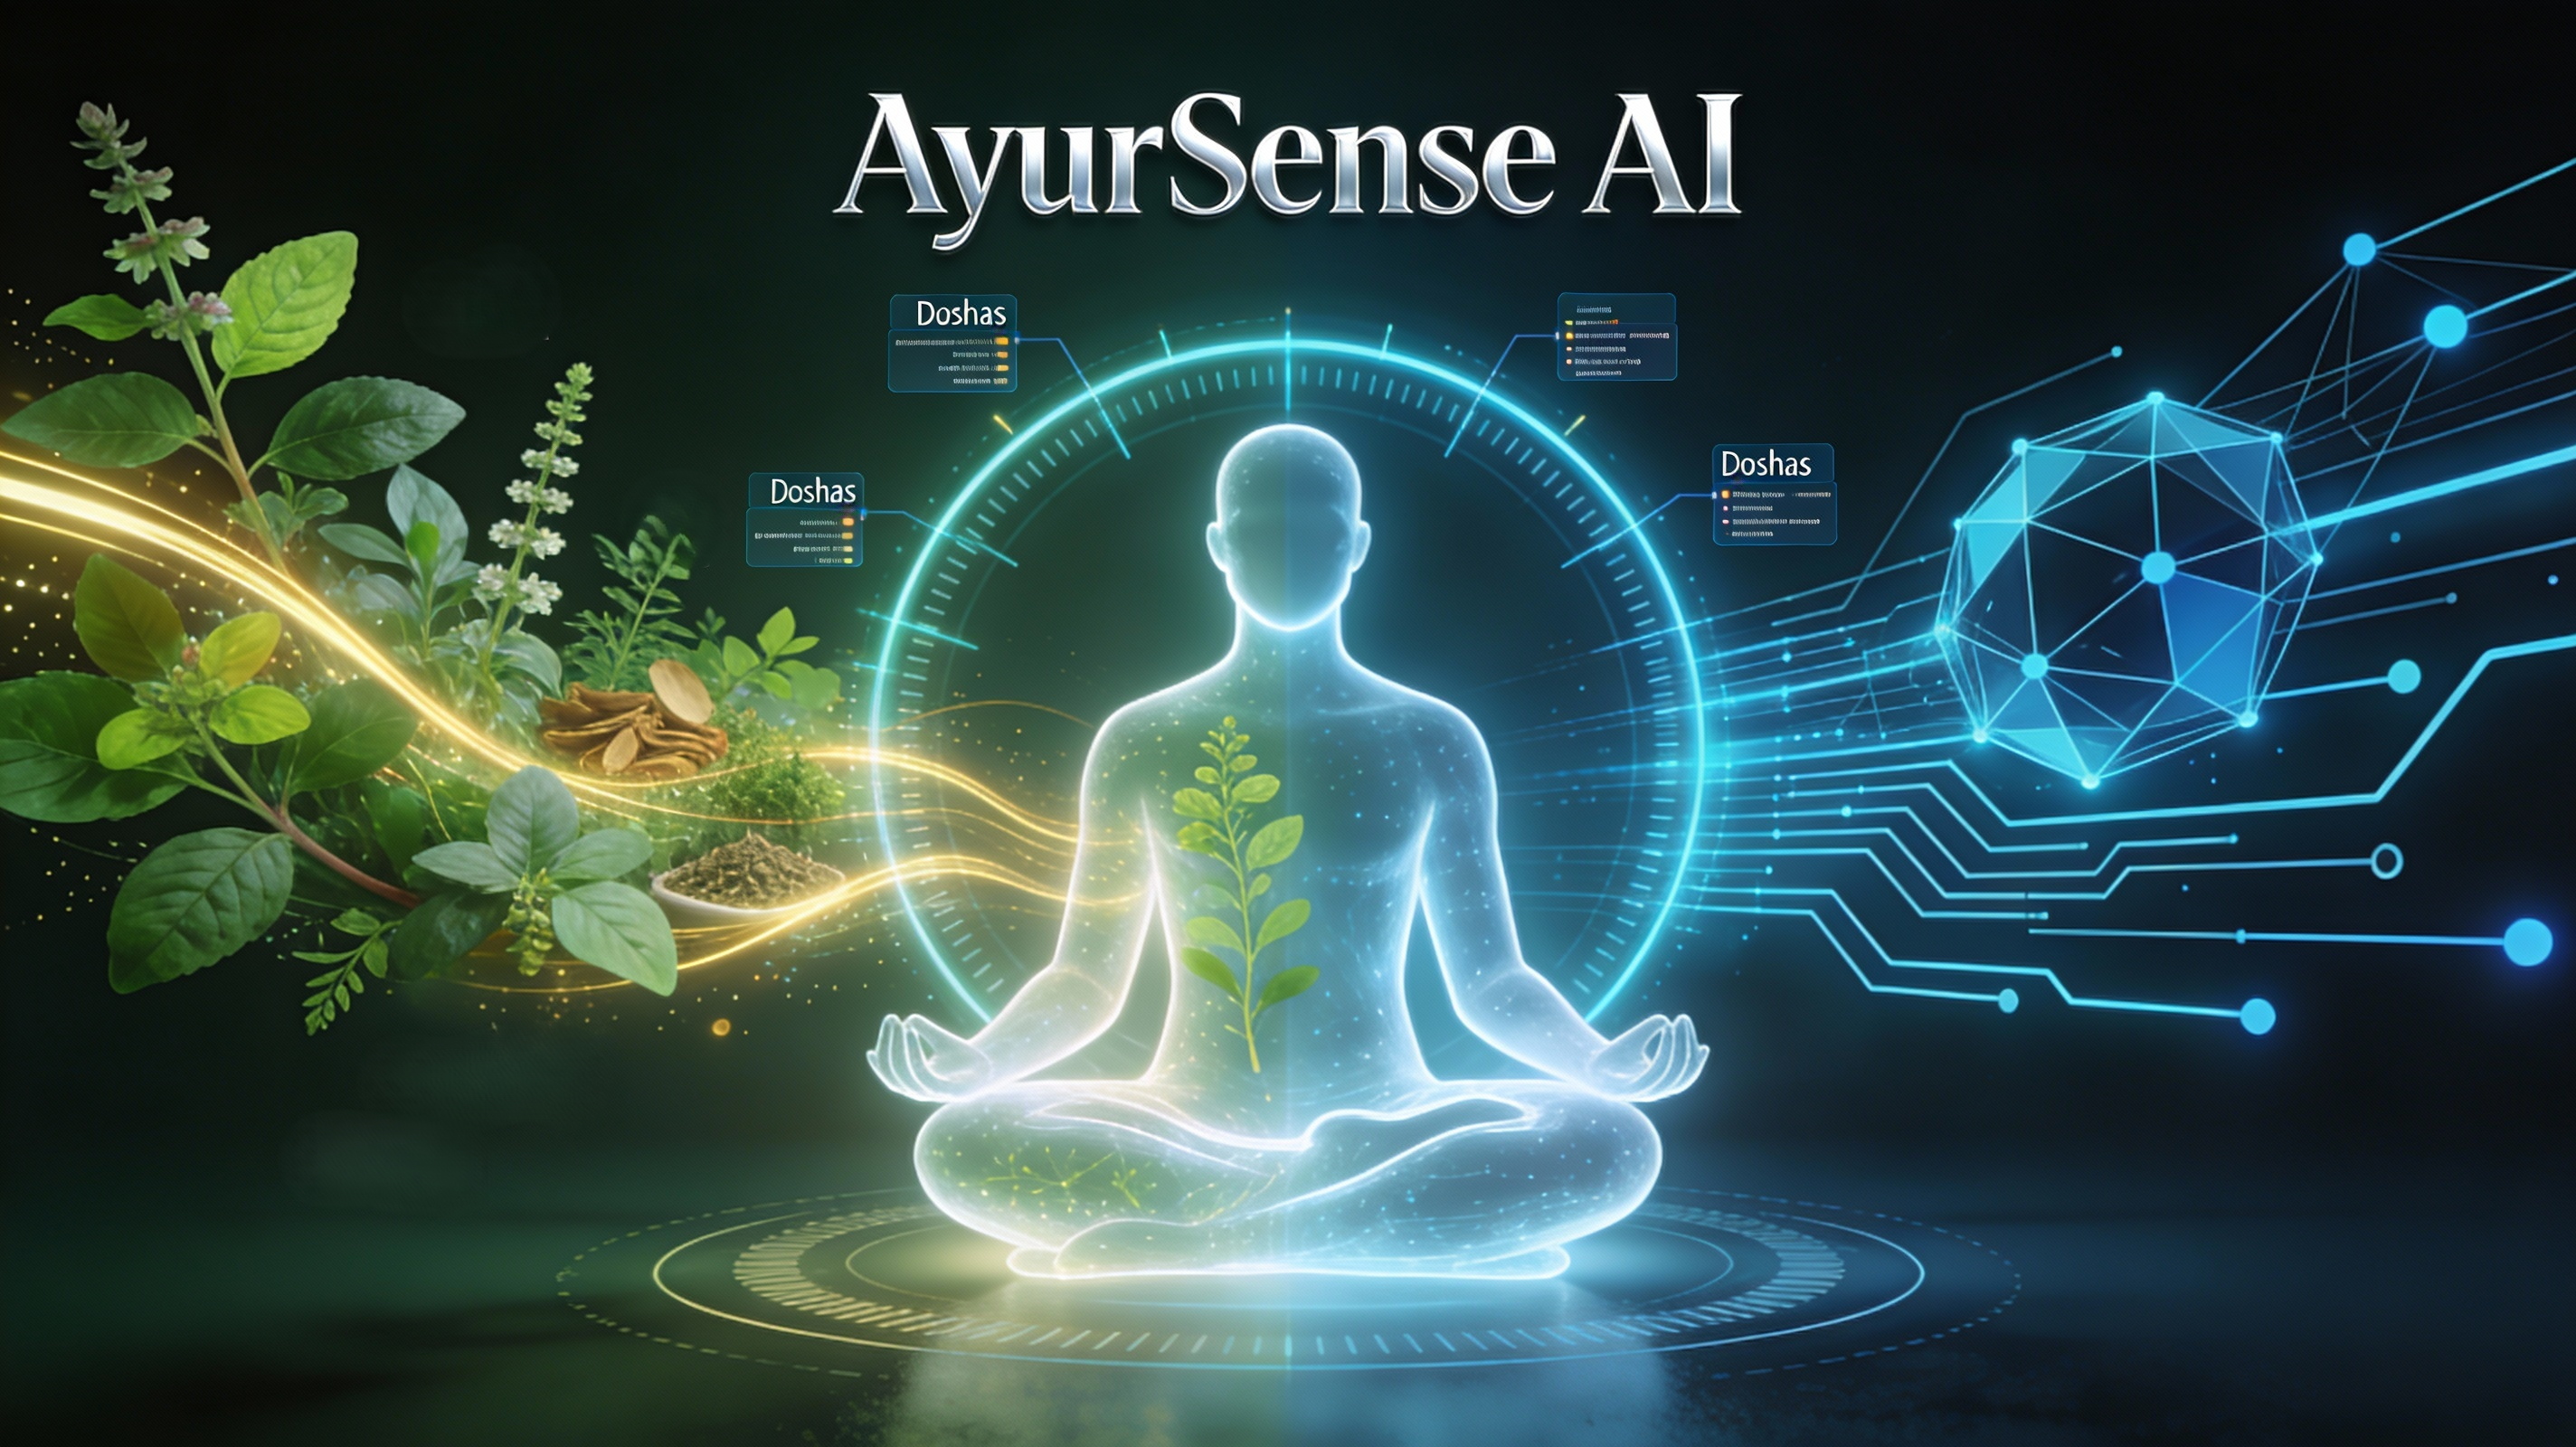

***AyurSense AI***

*This project presents the Ayurvedic E-Hospital Management System, a pioneering digital platform designed to bridge the gap between ancient Vedic wisdom and modern medical administration. While traditional Ayurveda relies on personalized and complex treatment protocols, modern healthcare demands efficiency and scalability. Our solution integrates these two worlds by digitizing specialized workflows such as Panchakarma resource scheduling and herbal inventory management into one seamless ecosystem. At the heart of this innovation lies our AI-Powered Prakriti Detector, a machine learning module that analyzes patient data to scientifically determine Dosha constitutions, ensuring that every diagnosis is data-driven, precise, and deeply personalized.*

In [30]:
# ==========================================
# AYURVEDIC PRAKRITI DETECTOR - TRAINING CODE
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 1. LOAD DATA
# -------------------------------------------------------
# Upload your 'Updated_Prakriti_With_Features.csv' to Colab files first!
file_path = "Updated_Prakriti_With_Features.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded Successfully!")
except FileNotFoundError:
    print("❌ Error: File not found. Please upload 'Updated_Prakriti_With_Features.csv' to the Colab files section.")

✅ Data Loaded Successfully!


In [31]:
# 2. DATA PREPROCESSING
# -------------------------------------------------------
# The target variable is 'Dosha'. We normalize it to lowercase to fix any casing issues (e.g., 'Pitta' vs 'pitta')
df['Dosha'] = df['Dosha'].str.lower().str.strip()

print(f"\nTarget Classes Found: {df['Dosha'].unique()}")

# Separate Features (X) and Target (y)
X = df.drop('Dosha', axis=1)
y = df['Dosha']

# Encoding Categorical Text Features
# Machine learning models need numbers, not text like "Slim" or "Oily".
# We use LabelEncoder to convert text answers into numbers.
encoders = {} # We save these to decode predictions later

for column in X.columns:
    le = LabelEncoder()
    # Fill missing values with 'unknown' just in case
    X[column] = X[column].fillna('unknown')
    X[column] = le.fit_transform(X[column].astype(str))
    encoders[column] = le

# Encode Target (Prakriti Types)
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)


Target Classes Found: ['vata+pitta' 'pitta' 'kapha' 'vata' 'pitta+kapha' 'vata+kapha']


In [32]:
# 3. TRAIN/TEST SPLIT
# -------------------------------------------------------
# Use 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [33]:
# 4. TRAIN THE AI MODEL
# -------------------------------------------------------
# We use RandomForest because it handles questionnaire data very well
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\n✅ Model Training Complete!")


✅ Model Training Complete!


In [34]:
# 5. EVALUATE PERFORMANCE
# -------------------------------------------------------
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


🎯 Model Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

       kapha       1.00      1.00      1.00         9
       pitta       1.00      1.00      1.00        33
 pitta+kapha       1.00      1.00      1.00        10
        vata       1.00      1.00      1.00        48
  vata+kapha       1.00      1.00      1.00        15
  vata+pitta       1.00      1.00      1.00       125

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [35]:
# 6. SAVE THE MODEL
# -------------------------------------------------------
# Save the model and encoders to use in your website/app later
joblib.dump(rf_model, 'ayurveda_prakriti_model.pkl')
joblib.dump(encoders, 'feature_encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')

print("💾 Model saved as 'ayurveda_prakriti_model.pkl'")

💾 Model saved as 'ayurveda_prakriti_model.pkl'


In [36]:
# ==========================================
# TEST: PREDICT FOR A NEW PATIENT
# ==========================================
def predict_prakriti(patient_data):
    # This function takes a dictionary of patient answers and predicts Prakriti
    input_df = pd.DataFrame([patient_data])

    # Encode the input data using the same encoders we trained with
    for col, le in encoders.items():
        if col in input_df.columns:
            # Handle unseen labels carefully
            input_df[col] = input_df[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

    prediction_index = rf_model.predict(input_df)[0]
    prakriti_name = target_encoder.inverse_transform([prediction_index])[0]
    return prakriti_name

# Example usage with dummy data (picking the first row of original data)
print("\n🔍 Testing with a sample patient...")
sample_patient = df.drop('Dosha', axis=1).iloc[0].to_dict()
predicted_type = predict_prakriti(sample_patient)
print(f"Predicted Prakriti: {predicted_type.upper()}")
print(f"Actual Prakriti:    {df['Dosha'].iloc[0].upper()}")


🔍 Testing with a sample patient...
Predicted Prakriti: VATA+PITTA
Actual Prakriti:    VATA+PITTA


In [37]:
# ==========================================
# FIXED: REAL-WORLD TESTING & VISUALIZATION
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# 1. PREPARE THE "REAL WORLD" DATA (FIXED)
# -------------------------------------------------------
# We need to select random samples from X_test, but we must
# ensure we get the MATCHING labels from y_test correctly.

# Combine X_test and y_test temporarily so we can sample them together
test_data_combined = X_test.copy()
test_data_combined['actual_label'] = y_test

# Select 20 random patients from our test set
if len(test_data_combined) >= 20:
    real_world_batch_combined = test_data_combined.sample(n=20, random_state=50)
else:
    # If test set is smaller than 20 (unlikely, but safe), take all of them
    real_world_batch_combined = test_data_combined

# Separate them back out
actual_labels = real_world_batch_combined['actual_label'].values # Get the truth
real_world_batch = real_world_batch_combined.drop('actual_label', axis=1) # Get features for prediction

print(f"🏥 Running Clinical Trial Simulation on {len(real_world_batch)} Patients...")
print("-" * 50)


🏥 Running Clinical Trial Simulation on 20 Patients...
--------------------------------------------------


Detailed Diagnosis Report:
    Patient ID Actual Prakriti AI Predicted  Status
0            1      vata+pitta   vata+pitta    True
1            2      vata+pitta   vata+pitta    True
2            3           pitta        pitta    True
3            4      vata+pitta   vata+pitta    True
4            5      vata+kapha   vata+kapha    True
5            6            vata         vata    True
6            7      vata+pitta   vata+pitta    True
7            8           kapha        kapha    True
8            9            vata         vata    True
9           10      vata+pitta   vata+pitta    True
10          11      vata+kapha   vata+kapha    True
11          12      vata+pitta   vata+pitta    True
12          13      vata+pitta   vata+pitta    True
13          14            vata         vata    True
14          15           pitta        pitta    True
15          16      vata+pitta   vata+pitta    True
16          17      vata+pitta   vata+pitta    True
17          18      vata+pitta   vata

/tmp/ipython-input-3274946951.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='magma')


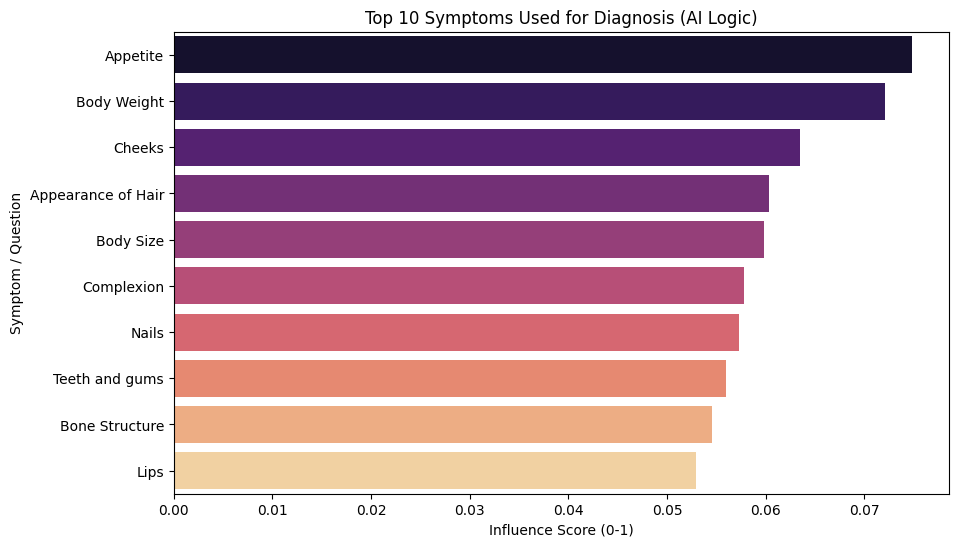

💡 INSIGHT: The chart above shows the 'Weight' of each question.
   - Example: If 'Body Frame' is at the top, it means the AI relies heavily on body size to decide.


In [38]:
# ==========================================
# ADVANCED DIAGNOSIS ANALYSIS & VISUALIZATION
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. RUN DIAGNOSIS (Standard Prediction)
# -------------------------------------------------------
predictions = rf_model.predict(real_world_batch)

# Convert codes to text
actual_names = target_encoder.inverse_transform(actual_labels)
predicted_names = target_encoder.inverse_transform(predictions)

# Create results dataframe
results_df = pd.DataFrame({
    'Patient ID': range(1, len(real_world_batch) + 1),
    'Actual Prakriti': actual_names,
    'AI Predicted': predicted_names
})
results_df['Status'] = results_df['Actual Prakriti'] == results_df['AI Predicted']

# Print Table
print("Detailed Diagnosis Report:")
print(results_df[['Patient ID', 'Actual Prakriti', 'AI Predicted', 'Status']])

# ==========================================
# NEW PLOT 1: WHAT DRIVES THE DECISION? (Feature Importance)
# ==========================================
# This answers: "Which symptoms did the AI look at most?"

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10) # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='magma')
plt.title('Top 10 Symptoms Used for Diagnosis (AI Logic)')
plt.xlabel('Influence Score (0-1)')
plt.ylabel('Symptom / Question')
plt.show()

print("💡 INSIGHT: The chart above shows the 'Weight' of each question.")
print("   - Example: If 'Body Frame' is at the top, it means the AI relies heavily on body size to decide.")

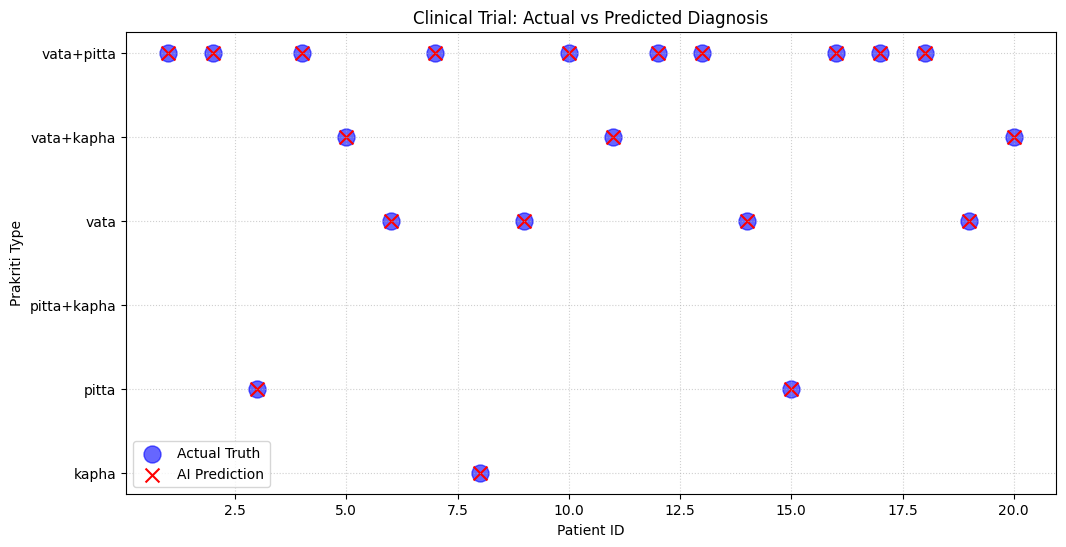

💡 INSIGHT: Look for Red 'X' marks.
   - If an 'X' is perfectly inside a Blue Circle, the diagnosis was CORRECT.
   - If an 'X' is separate (connected by a dotted line), that is a MISDIAGNOSIS.


In [39]:
# ==========================================
# NEW PLOT 2: PREDICTION MATCH VISUALIZER
# ==========================================
# This visualizes WHERE the errors happened in this specific batch.

plt.figure(figsize=(12, 6))

# We assign a number to each Dosha type for plotting purposes
dosha_types = target_encoder.classes_
type_map = {type_: i for i, type_ in enumerate(dosha_types)}

# Map names to numbers for plotting
actual_indices = [type_map[name] for name in actual_names]
pred_indices = [type_map[name] for name in predicted_names]
patient_ids = range(1, len(real_world_batch) + 1)

# Plot Actual (Blue Circles)
plt.scatter(patient_ids, actual_indices, color='blue', s=150, alpha=0.6, label='Actual Truth')

# Plot Predicted (Red X)
# If the Red X is inside the Blue Circle, it's correct. If separated, it's wrong.
plt.scatter(patient_ids, pred_indices, color='red', marker='x', s=100, label='AI Prediction')

# Draw lines connecting mismatches to make them obvious
for i in range(len(patient_ids)):
    if actual_indices[i] != pred_indices[i]:
        plt.plot([patient_ids[i], patient_ids[i]], [actual_indices[i], pred_indices[i]], color='gray', linestyle='--', alpha=0.5)

plt.yticks(range(len(dosha_types)), dosha_types)
plt.title('Clinical Trial: Actual vs Predicted Diagnosis')
plt.xlabel('Patient ID')
plt.ylabel('Prakriti Type')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print("💡 INSIGHT: Look for Red 'X' marks.")
print("   - If an 'X' is perfectly inside a Blue Circle, the diagnosis was CORRECT.")
print("   - If an 'X' is separate (connected by a dotted line), that is a MISDIAGNOSIS.")

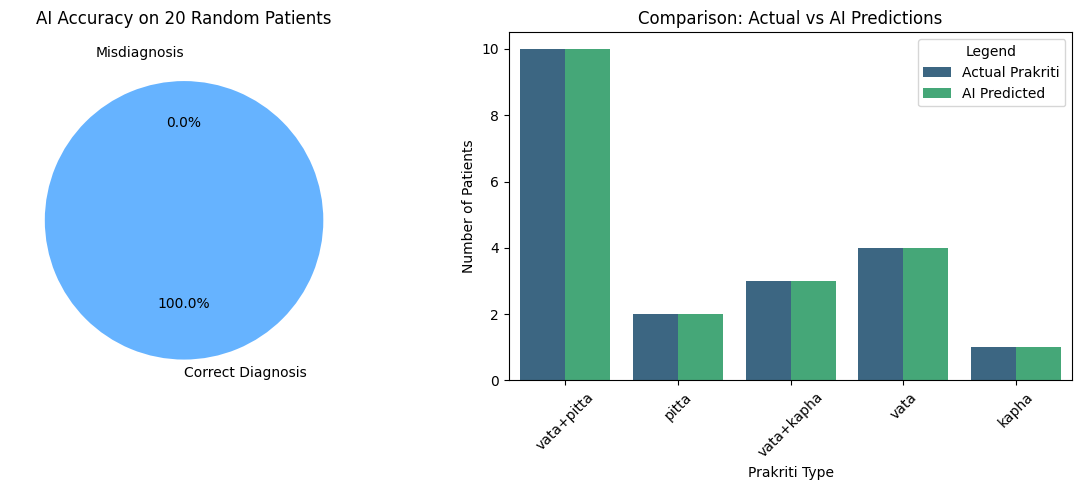

In [40]:
# 3. VISUALIZATION OF ACCURACY
# -------------------------------------------------------
# PLOT 1: Accuracy Pie Chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Handle case where accuracy is 100% or 0% to avoid plotting errors
if total_count > 0:
    plt.pie([correct_count, total_count-correct_count],
            labels=['Correct Diagnosis', 'Misdiagnosis'],
            autopct='%1.1f%%',
            colors=['#66b3ff', '#ff9999'],
            startangle=90,
            explode=(0.1, 0))
    plt.title(f'AI Accuracy on {total_count} Random Patients')

# PLOT 2: Actual vs Predicted Comparison
plt.subplot(1, 2, 2)

# Count frequency of each type
comparison_data = pd.melt(results_df,
                          id_vars=['Patient ID'],
                          value_vars=['Actual Prakriti', 'AI Predicted'],
                          var_name='Type', value_name='Prakriti')

sns.countplot(data=comparison_data, x='Prakriti', hue='Type', palette='viridis')
plt.title('Comparison: Actual vs AI Predictions')
plt.xlabel('Prakriti Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Legend')

plt.tight_layout()
plt.show()


In [41]:
# 4. FINAL VERDICT
# -------------------------------------------------------
if trial_accuracy > 85:
    print("\n✅ PASSED: The model is reliable enough for the Hospital Project.")
elif trial_accuracy > 70:
    print("\n⚠️ CAUTION: The model is okay, but needs more training data before clinical use.")
else:
    print("\n❌ FAILED: Do not use this model yet. Retrain with a larger dataset.")


✅ PASSED: The model is reliable enough for the Hospital Project.
